In [29]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from kmeans import KMeans

In [30]:
# load iris dataset
fname = Path("datasets/iris.data")
data = np.loadtxt(fname, delimiter=",",
    dtype={
        "names": ("sepal_length", "sepal_width", "petal_length", "petal_width", "class"),
        "formats": (np.float64, np.float64, np.float64, np.float64, "object")
    })

In [31]:
classes = np.unique(data["class"])
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [32]:
def normalize(x):
    return (x - np.mean(x)) / np.std(x)

In [33]:

xlabel = "petal_length"
ylabel = "petal_width"
huelabel = "class"

In [34]:
x_data = normalize(data[xlabel])
y_data = normalize(data[ylabel])

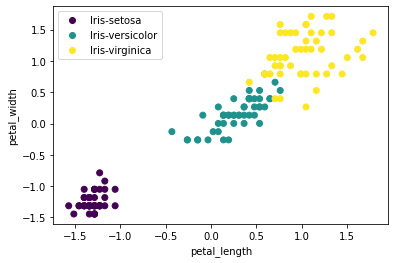

In [35]:

fig, ax = plt.subplots()
sc = ax.scatter(x_data, y_data, c=[np.where(classes==x)[0][0] for x in data[huelabel]])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
legend = ax.legend(sc.legend_elements(prop="colors")[0], classes)

In [36]:
# Guess initial means
means = [(-1.5, -1), (0, 0), (1.5, 1.5)]

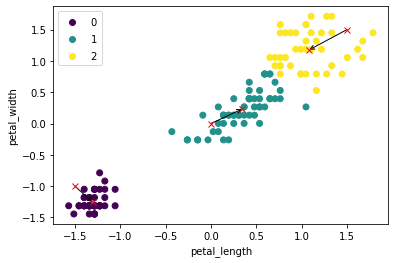

In [37]:
km = KMeans(x_data, y_data, means=means, labels=(xlabel, ylabel))
km.show_step() #1

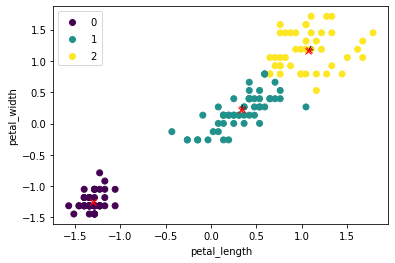

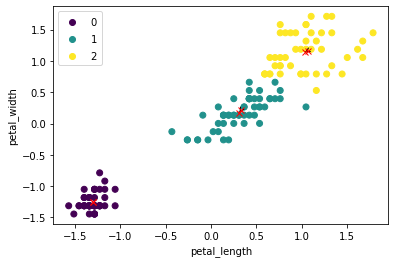

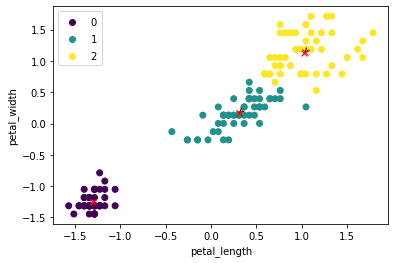

In [38]:
km.show_step() #2
km.show_step() #3
km.show_step() #4

In [51]:
n = len(x_data)
accuracy = sum(classes[km.cluster_ixs[i]] == data[huelabel][i] for i in range(n)) / n
accuracy

0.96